<a href="https://colab.research.google.com/github/SrihithaParvathaneni19/fmml-project-/blob/main/FMML_Module4_Lab1_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [32]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [33]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [34]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [35]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

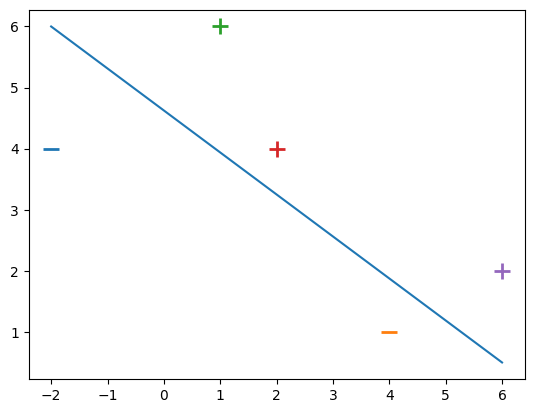

In [36]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

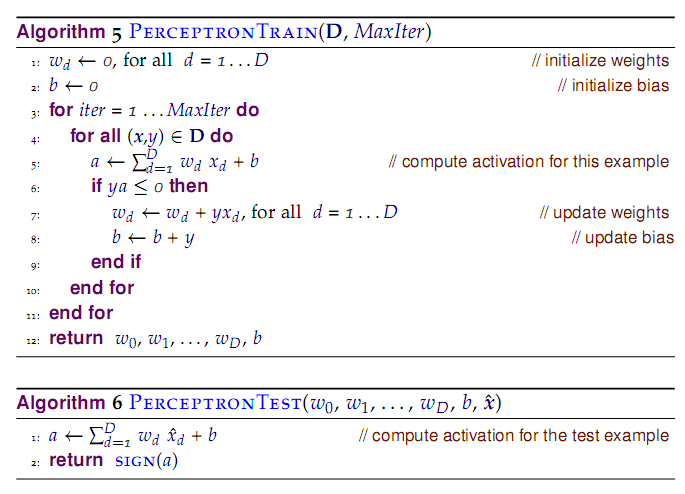

The algorithm is shown in the above image.

In [37]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [38]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

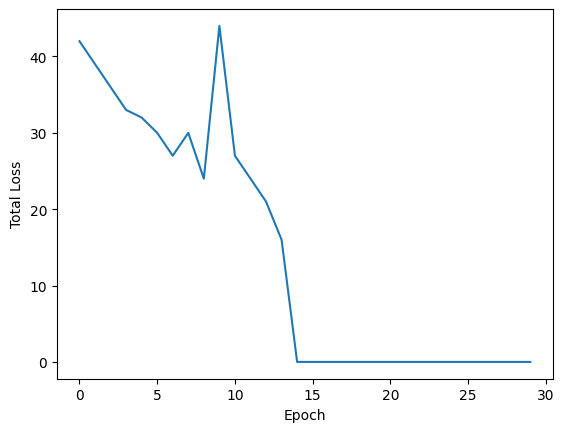

In [39]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

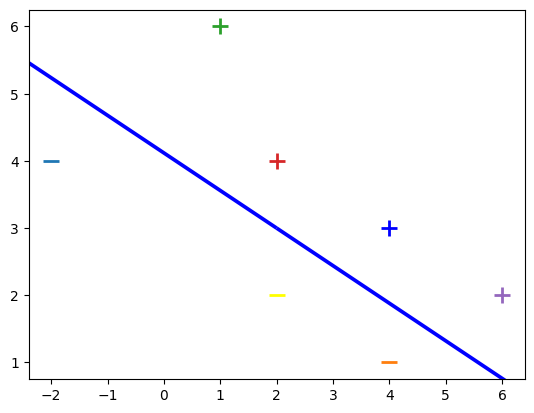

In [40]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [41]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [42]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


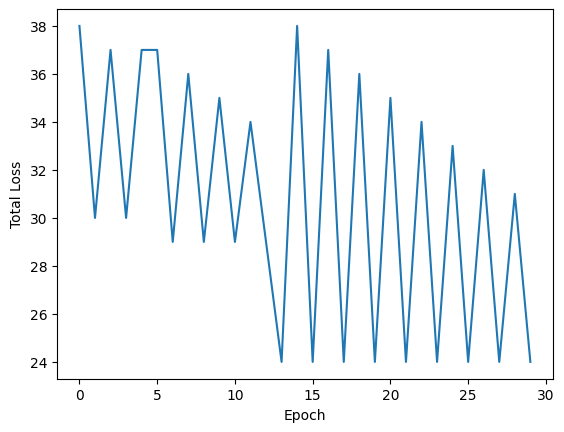

In [43]:
print(perceptron_algo_plot(X, y))

In [44]:
!pip install pandas numpy matplotlib scikit-learn

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
class perceptron:
    def __init__(self, learning_rate=0.11, max_iteration=1000):
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        errors = []
        for _ in range(self.max_iteration):
            total_error = 0
            for i in range(n_samples):
                prediction = self.predict(X[i])
                update = self.learning_rate * (y[i] - prediction)
                self.weights += update * X[i]
                self.bias += update
                total_error += int(update != 0.0)
            errors.append(total_error)
            if total_error == 0:
                break
        return errors

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

In [47]:
#Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data" # Corrected the URL by removing the extra 'https://'
df = pd.read_csv(url, header=None)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
y = np.where(y == 'R', 0 ,1)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

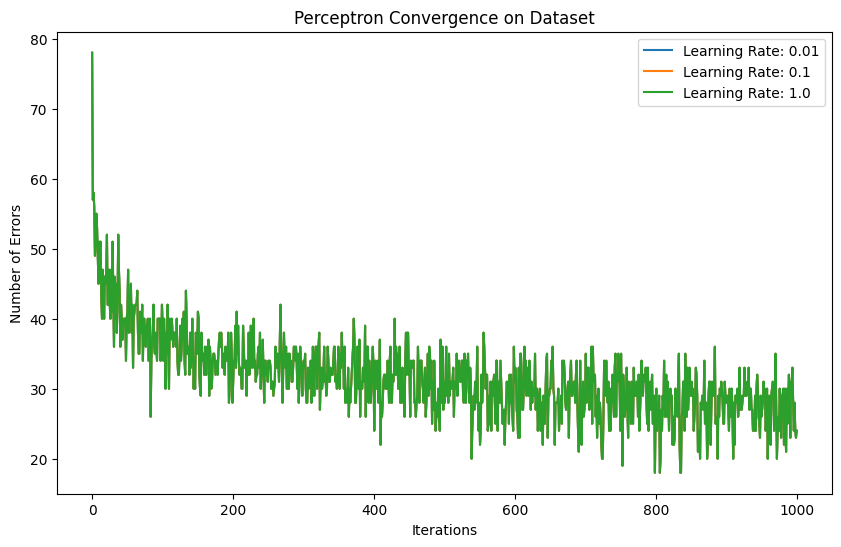

In [49]:
learning_rates = [0.01, 0.1, 1.0]
plt.figure(figsize=(10, 6))

for lr in learning_rates:
    # Create a new instance of the perceptron class for each learning rate
    # Changed 'Perceptron' to 'perceptron' to match the class definition
    # Use the class name directly to create an instance:
    # Fixed: Use a different variable name to avoid overwriting the class
    perceptron_instance = perceptron(learning_rate=lr)
    errors = perceptron_instance.fit(X_train, y_train)
    plt.plot(errors, label=f"Learning Rate: {lr}")

plt.xlabel("Iterations")
plt.ylabel("Number of Errors")
plt.title("Perceptron Convergence on Dataset")
plt.legend()
plt.show()

In [51]:
#evaluating the perceptron's accuracy
# Fixed: Use the perceptron_instance you created during training
y_pred = perceptron_instance.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.7142857142857143


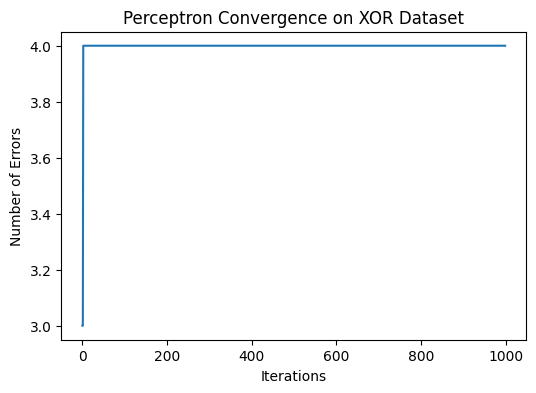

In [53]:
#Non-linearly separable dataset (XOR)
X_xor = np.array([[0, 0], [0,1], [1,0], [1,1]])
y_xor = np.array([0, 1, 1, 0])

perceptron_xor = perceptron(learning_rate=0.1, max_iteration=1000)
errors_xor = perceptron_xor.fit(X_xor, y_xor)

plt.figure(figsize=(6, 4))
plt.plot(errors_xor)
plt.xlabel("Iterations")
plt.ylabel("Number of Errors")
plt.title("Perceptron Convergence on XOR Dataset")
plt.show()

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

1) Dataset:

This dataset represents the boolean AND function with two binary inputs (x1, x2) and output (y):

x1x2y
0	0	-
0	1	-
1	0	-
1	1	+

i) Learnability by Perceptron:
 This dataset is learnable by Perceptron and the reason is that it is linearly separable. You can visualize this by plotting the four data points on a 2D plane (x1, x2) and observe a single straight line can separate the '+' point (1, 1) from the '-' points (0, 0), (0, 1), and (1, 0).

ii) Weights Update Procedure:

Let's denote the weights as w = [w1, w2] and the bias as b. The Perceptron update rule is:

If the prediction is correct, no update is made.
If the prediction is incorrect:
If the true label is '+' and the prediction is '-', update: w = w + x, b = b + 1
If the true label is '-' and the prediction is '+', update: w = w - x, b = b - 1.

Initialization: w = [0, 0], b = 0

Iterations:

(x1, x2) = (0, 0), y = '-':

Prediction: w.x + b = 0*0 + 0*0 + 0 = 0. Since 0 >= 0, the predicted label is '+'.
Incorrect prediction. True label is '-', predicted label is '+'.
Update: w = [0, 0] - [0, 0] = [0, 0], b = 0 - 1 = -1
(x1, x2) = (0, 1), y = '-':

Prediction: w.x + b = 0*0 + 0*1 - 1 = -1. Since -1 < 0, the predicted label is '-'.
Correct prediction. No update.
(x1, x2) = (1, 0), y = '-':

Prediction: w.x + b = 0*1 + 0*0 - 1 = -1. Since -1 < 0, the predicted label is '-'.
Correct prediction. No update.
(x1, x2) = (1, 1), y = '+':

Prediction: w.x + b = 0*1 + 0*1 - 1 = -1. Since -1 < 0, the predicted label is '-'.
Incorrect prediction. True label is '+', predicted label is '-'.
Update: w = [0, 0] + [1, 1] = [1, 1], b = -1 + 1 = 0
Repeat steps 1-4 until all points are classified correctly.

After a few more iterations, the Perceptron will converge to a solution where the weights and bias correctly classify all data points. For example, a possible solution could be w = [1, 1] and b = -1. This would result in the following decision boundary:


x1 + x2 - 1 = 0

2) Total Boolean Functions:
With 2 input bit(x1&x2) there are 2^2 =4 possible input combination. for each input combination, the output can either be 0 or 1. therefore, there are (2^2)^2 = 16 distnct boolean function.
Learnable Boolean Function:

Boolean function is learnable by percepton if it is linearly sepreable. this means that this exists line this can perfectly seprate the input points with output 1 from the input points with output 0

Number of Learnable Functions:

out of the 16 possible boolean function, 14 are learnable by perceptron but this because only 2 of them are not linearly seperable.

Non-learnable Boolean Function:
Two non-learnable function are XOR and XNOR their truth table is as follows:

XOR:
X1 X2 Y
0  0  0
0  1  1
1  0  1
1  1  0

XNOR:
X1 X2 Y
0  0  1
0  1  0
1  0  0
1  1  1

Why XOR and XNOR are Not Learnable:
if we try to plot these function on 2D plane, we will see that we cannot draw a single straight line to separate the points with output 0 and this is the characterstic of non linearly separable function, and the perceptron and being a linear classifier cannot learn them.
